In [217]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)

# Part 1 and 2: EDA, Preprocessing, and merging

In [218]:
df_med = pd.read_csv('longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')
df_pre = pd.read_csv('longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/385895329.py:2: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pre = pd.read_csv('/Users/shayanfarshid/Desktop/UC Davis MSBA /Winter Semester/Machine Learning/Ozempic Dataset/A5/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')


In [219]:
df_med.head()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,visit_type,payor,payor_channel,ref_npi,hcp_npi,hcp_taxonomy,hcp_specialty,hco_npi,hcp_npi_list,hco_npi_list,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,NaN,1.184717e+09,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,NaN,1.184717e+09,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,outpatient visit,inland empire health plan,commercial,1.619408e+09,1.497724e+09,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1.396433e+09,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,outpatient visit,inland empire health plan,commercial,1.619408e+09,1.497724e+09,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1.396433e+09,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,laboratory visit,centene corporation,commercial,NaN,NaN,NaN,NaN,1.366479e+09,NaN,1366479099,N200,N200,NaN,NaN,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [220]:
df_pre.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,primary_care_npi,group_id,date_of_service,date_authorized,transaction_type,date_prescription_written,ndc11,ndc11_original,number_of_refills_authorized,diagnosis_code,diagnosis_code_type,quantity_prescribed_original,quantity_dispensed,place_of_service,is_service,level_of_service,fill_number,days_supply,unit_of_measure,daw_code,prior_authorization_type_code,is_compound_drug,coupon_type,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,pcn,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-04-15,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,2.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,29.79,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-03-16,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,1.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,28.95,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-05-17,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,3.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,29.99,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-02-15,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,0.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,28.95,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-02-14,NaN,PAID,2022-02-14,65862059805,0.0,0.0,NaN,NaN,NaN,90.0,NaN,NaN,0.0,0.0,90.0,NaN,0.0,NaN,NaN,NaN,NaN,17.10,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,65862059805,True,190001,NaN


In [221]:
df_med[df_med['journey_id'] == '00006390c96ebfffed580074c35a16a7']

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,visit_type,payor,payor_channel,ref_npi,hcp_npi,hcp_taxonomy,hcp_specialty,hco_npi,hcp_npi_list,hco_npi_list,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,NaN,1.184717e+09,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.0,300.0,974.13
1,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,NaN,1.184717e+09,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.0,300.0,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,outpatient visit,inland empire health plan,commercial,1.619408e+09,1.497724e+09,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1.396433e+09,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.0,0.0,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,outpatient visit,inland empire health plan,commercial,1.619408e+09,1.497724e+09,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1.396433e+09,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.0,0.0,56.38


In [222]:
df_med.describe() # A statistical summary of the dataset


,patient_short_zip,patient_age,ref_npi,hcp_npi,hco_npi,rev_center_code,rev_center_units,proc_units,line_charge,claim_charge,smart_allowed
count,623512.000000,616980.000000,2.975010e+05,4.346530e+05,6.177890e+05,113926.000000,621558.000000,621331.000000,623525.000000,623525.000000,623525.000000
mean,907.514954,59.416910,1.502083e+09,1.508734e+09,1.485095e+09,456.083449,1.243236,4.319060,482.437268,482.437268,190.295642
std,40.034735,9.946158,2.868359e+08,2.825083e+08,2.859965e+08,451.591644,2.458118,55.208116,3582.592825,3582.592825,509.339625
min,74.000000,30.000000,1.003001e+09,1.003001e+09,1.003006e+09,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,55.000000,1.255437e+09,1.265668e+09,1.245340e+09,301.000000,1.000000,1.000000,10.000000,10.000000,18.190000
50%,911.000000,60.000000,1.508952e+09,1.528016e+09,1.467631e+09,320.000000,1.000000,1.000000,70.000000,70.000000,75.230000
75%,922.000000,65.000000,1.740350e+09,1.740376e+09,1.720295e+09,521.000000,1.000000,1.000000,200.000000,200.000000,182.360000
max,999.000000,80.000000,1.992999e+09,1.993000e+09,1.992995e+09,3103.000000,730.000000,12473.000000,778750.000000,778750.000000,45035.960000


In [223]:
df_pre.describe() # A statistical summary of the dataset

,cohort_id,patient_zip,pharmacy_npi,pharmacist_npi,ndc11,ndc11_original,number_of_refills_authorized,diagnosis_code_type,quantity_prescribed_original,quantity_dispensed,place_of_service,level_of_service,fill_number,days_supply,prior_authorization_type_code,coupon_type,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,bin,plan_pay,ndc,start_date,end_date
count,894623.000000,894501.000000,8.399580e+05,2.157800e+04,8.946230e+05,9.420300e+04,849519.000000,111634.000000,322348.00000,8.946160e+05,346197.000000,217951.000000,894623.000000,894623.000000,8916.000000,2030.0,5.0,7.850810e+05,601820.000000,411383.000000,786240.000000,491878.000000,8.946230e+05,894623.000000,32448.000000
mean,16.065902,886.761085,1.505555e+09,1.475807e+09,3.913810e+10,1.318060e+10,2.496945,9.999113,11.03221,7.151479e+01,1.111766,0.030108,0.855659,41.070293,3.204127,88.0,99.0,4.547052e+02,10.890529,7.075289,121957.811418,167.327912,3.913810e+10,190740.803998,201718.841285
std,0.248110,121.719342,2.862710e+08,2.925536e+08,2.808575e+10,2.446082e+10,6.861014,0.029767,85.75864,3.589294e+03,1.252912,0.405516,1.600734,29.708626,3.410493,0.0,0.0,4.805967e+04,96.639674,59.716082,230816.951281,802.330352,2.808575e+10,2830.185124,400.902819
min,16.000000,100.000000,1.003010e+09,1.003455e+09,2.143301e+06,0.000000e+00,-1.000000,9.000000,0.00000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,88.0,99.0,-7.370000e+00,-189.700000,-3198.400000,0.000000,-1458.620000,2.143301e+06,190001.000000,201001.000000
25%,16.000000,900.000000,1.255441e+09,1.154909e+09,9.046999e+08,0.000000e+00,0.000000,10.000000,0.00000,3.000000e+01,1.000000,0.000000,0.000000,30.000000,1.000000,88.0,99.0,2.799000e+01,0.000000,0.000000,4336.000000,2.290000,9.046999e+08,190001.000000,201411.000000
50%,16.000000,913.000000,1.497865e+09,1.457999e+09,4.948305e+10,0.000000e+00,1.000000,10.000000,0.00000,3.000000e+01,1.000000,0.000000,0.000000,30.000000,1.000000,88.0,99.0,9.526000e+01,0.000000,1.350000,17010.000000,13.580000,4.948305e+10,190001.000000,201802.000000
75%,16.000000,922.000000,1.740323e+09,1.689011e+09,6.586206e+10,9.551004e+08,3.000000,10.000000,0.00000,9.000000e+01,1.000000,0.000000,1.000000,50.000000,8.000000,88.0,99.0,3.220600e+02,4.000000,4.150000,22659.000000,36.300000,6.586206e+10,190001.000000,201907.000000
max,17.000000,992.000000,6.167056e+09,1.992978e+09,9.920701e+10,9.920705e+10,99.000000,10.000000,10000.00000,3.390291e+06,60.000000,7.000000,99.000000,999.000000,99.000000,88.0,99.0,4.252220e+07,25598.020000,6923.160000,900020.000000,50307.120000,9.920701e+10,202308.000000,202307.000000


In [224]:
#Dropping the columns below as they are not needed for the analysis

In [225]:
df_med_v1 = df_med.drop(columns = ['episode_id','visit_id','encounter_id','patient_short_zip','ref_npi','hcp_npi','hco_npi'])

In [226]:
df_med_v1.head()

,journey_id,claim_date,patient_state,patient_age,patient_gender,place_of_service,visit_type,payor,payor_channel,hcp_taxonomy,hcp_specialty,hcp_npi_list,hco_npi_list,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,inland empire health plan,managed medicaid,NaN,NaN,NaN,1184716672,I872,I872,NaN,NaN,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,inland empire health plan,commercial,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,inland empire health plan,commercial,207R00000X - Allopathic and Osteopathic Physic...,Internal Medicine,1497723803,"1396432571,1437111028","I5020,I480,I872,L03115,L03116,M179,R7303,Z712",I5020,I480,I872,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,2023-08-11,CA,55.0,F,Independent Laboratory,laboratory visit,centene corporation,commercial,NaN,NaN,NaN,1366479099,N200,N200,NaN,NaN,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16


In [227]:
list_columns_med = list(df_med_v1.columns)

In [228]:
for i in list_columns_med:
    x = len(df_med_v1[i].unique())
    print('Unique values for column ' + i + ':', x) # Checking unique values for each column

Unique values for column journey_id: 27377
Unique values for column claim_date: 664
Unique values for column patient_state: 5
Unique values for column patient_age: 12
Unique values for column patient_gender: 3
Unique values for column place_of_service: 32
Unique values for column visit_type: 9
Unique values for column payor: 190
Unique values for column payor_channel: 9
Unique values for column hcp_taxonomy: 340
Unique values for column hcp_specialty: 192
Unique values for column hcp_npi_list: 32739
Unique values for column hco_npi_list: 16893
Unique values for column diag_list: 150711
Unique values for column diag_1: 8669
Unique values for column diag_2: 7432
Unique values for column diag_3: 6197
Unique values for column diag_4: 5324
Unique values for column diag_5: 4149
Unique values for column rev_center_code: 270
Unique values for column rev_center_units: 64
Unique values for column proc_code: 6348
Unique values for column proc_modifier: 300
Unique values for column proc_units: 617

In [229]:
df_med_v2 = df_med_v1.drop(columns = ['payor', 'hcp_taxonomy', 'hcp_specialty', 'hcp_npi_list', 'hco_npi_list','diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', 'rev_center_code', 'rev_center_units', 'proc_modifier'])
##Dropping as they are categorical vars and have high no. of unique values

In [230]:
df_med_v2.head()

,journey_id,claim_date,patient_state,patient_age,patient_gender,place_of_service,visit_type,payor_channel,proc_code,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.00,300.00,974.13
1,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,commercial,3074F,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,commercial,3078F,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,2023-08-11,CA,55.0,F,Independent Laboratory,laboratory visit,commercial,80053,1.0,88.07,88.07,15.16


In [231]:
df_med_v2['claim_date'] = pd.to_datetime(df_med_v2['claim_date']) #Converting to datetime format
df_med_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   journey_id        623525 non-null  object        
 1   claim_date        623525 non-null  datetime64[ns]
 2   patient_state     623525 non-null  object        
 3   patient_age       616980 non-null  float64       
 4   patient_gender    623393 non-null  object        
 5   place_of_service  484555 non-null  object        
 6   visit_type        600454 non-null  object        
 7   payor_channel     586086 non-null  object        
 8   proc_code         599612 non-null  object        
 9   proc_units        621331 non-null  float64       
 10  line_charge       623525 non-null  float64       
 11  claim_charge      623525 non-null  float64       
 12  smart_allowed     623525 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 6

In [232]:
df_med_v2.sort_values(by = ['journey_id','claim_date'], inplace = True)

In [233]:
def display_missing_perc(df_med_v2):    
    for col in sorted(df_med_v2.columns.tolist(), key=lambda x: df_med_v2[x].isnull().sum(), reverse=True):          
        print(f'{col} column missing values percent: {100*(df_med_v2[col].isnull().sum()/len(df_med_v2[col]))}')
    print('\n')

display_missing_perc(df_med_v2)

place_of_service column missing values percent: 22.287799206126458
payor_channel column missing values percent: 6.004410408564211
proc_code column missing values percent: 3.8351309089451107
visit_type column missing values percent: 3.7000922176336153
patient_age column missing values percent: 1.0496772382823463
proc_units column missing values percent: 0.3518704141774588
patient_gender column missing values percent: 0.02116996110821539
journey_id column missing values percent: 0.0
claim_date column missing values percent: 0.0
patient_state column missing values percent: 0.0
line_charge column missing values percent: 0.0
claim_charge column missing values percent: 0.0
smart_allowed column missing values percent: 0.0




In [234]:
df_med_v3 = df_med_v2.dropna(subset = ['patient_age','patient_gender','visit_type','payor_channel','proc_code','proc_units'])

In [235]:
df_med_v3.isnull().sum()

journey_id              0
claim_date              0
patient_state           0
patient_age             0
patient_gender          0
place_of_service    92655
visit_type              0
payor_channel           0
proc_code               0
proc_units              0
line_charge             0
claim_charge            0
smart_allowed           0
dtype: int64

In [236]:
place_of_service_list = list(df_med_v3['place_of_service'].unique()) #Checking unique values for place of service

In [237]:
df_med_v3['place_of_service'] = df_med_v3['place_of_service'].apply(lambda x: np.random.choice(place_of_service_list) if pd.isnull(x) else x)
#using apply function to modify 'place_of_service'by replacing missing values w random choice

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/2683417855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_v3['place_of_service'] = df_med_v3['place_of_service'].apply(lambda x: np.random.choice(place_of_service_list) if pd.isnull(x) else x)


In [238]:
df_med_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542918 entries, 0 to 623524
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   journey_id        542918 non-null  object        
 1   claim_date        542918 non-null  datetime64[ns]
 2   patient_state     542918 non-null  object        
 3   patient_age       542918 non-null  float64       
 4   patient_gender    542918 non-null  object        
 5   place_of_service  542918 non-null  object        
 6   visit_type        542918 non-null  object        
 7   payor_channel     542918 non-null  object        
 8   proc_code         542918 non-null  object        
 9   proc_units        542918 non-null  float64       
 10  line_charge       542918 non-null  float64       
 11  claim_charge      542918 non-null  float64       
 12  smart_allowed     542918 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 58.0+ 

In [239]:
df_med_v3['place_of_service'].nunique()

32

In [240]:
df_med_v3_place_pivot = pd.pivot_table(df_med_v3, index = 'place_of_service',values = 'journey_id',aggfunc = len) #Pivot table
df_med_v3_place_pivot.reset_index(inplace = True) #index reset
df_med_v3_place_pivot.sort_values('journey_id', inplace = True)
df_med_v3_place_pivot['place_of_service_group'] = np.where(df_med_v3_place_pivot['journey_id']<5000, 'Other',df_med_v3_place_pivot['place_of_service'])
df_med_v3_place_pivot

,place_of_service,journey_id,place_of_service_group
26,Public Health Clinic,2825,Other
18,Non-residential Substance Abuse Treatment Faci...,2850,Other
3,Birthing Center,2860,Other
12,Hospice,2875,Other
31,nan,2898,Other
10,Group Home,2901,Other
0,Ambulance - Air or Water,2907,Other
30,Walk-in Retail Health Clinic,2929,Other
24,Place of Employment/Worksite,2969,Other
17,Mobile Unit,2977,Other


In [241]:
df_med_v3 = pd.merge(df_med_v3, df_med_v3_place_pivot[['place_of_service','place_of_service_group']], on = 'place_of_service', how = 'inner')
#merged pivot table with original df

In [242]:
df_med_v3.head()

,journey_id,claim_date,patient_state,patient_age,patient_gender,place_of_service,visit_type,payor_channel,proc_code,proc_units,line_charge,claim_charge,smart_allowed,place_of_service_group
0,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.0,300.0,974.13,Home
1,00006390c96ebfffed580074c35a16a7,2020-07-13,CA,55.0,M,Home,home visit,managed medicaid,A6549,2.0,300.0,300.0,974.13,Home
2,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,commercial,3074F,1.0,0.0,0.0,46.57,Office
3,00006390c96ebfffed580074c35a16a7,2023-07-19,CA,60.0,M,Office,outpatient visit,commercial,3078F,1.0,0.0,0.0,56.38,Office
4,00006d564a4718c744f1bbf1b6c5f8c3,2019-11-01,CA,50.0,F,Office,outpatient visit,commercial,72072,1.0,107.0,107.0,72.42,Office


In [243]:
df_med_v3.drop(columns = 'place_of_service',inplace = True)

In [244]:
df_med_v3['place_of_service_group'].unique()

array(['Home', 'Office', 'Independent Laboratory', 'Ambulance - Land',
       'On Campus-Outpatient Hospital', 'Other',
       'Emergency Room - Hospital', 'Federally Qualified Health Center',
       'Ambulatory Surgical Center', 'Urgent Care Facility',
       'Independent Clinic', 'Inpatient Hospital'], dtype=object)

In [245]:
df_med_v4 = pd.get_dummies(df_med_v3, columns = ['patient_state','patient_gender', 'visit_type','payor_channel','place_of_service_group'])
#Dummy variables for categorical variables

In [246]:
df_med_v4.head()

,journey_id,claim_date,patient_age,proc_code,proc_units,line_charge,claim_charge,smart_allowed,patient_state_AE,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,patient_gender_F,patient_gender_M,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Ambulance - Land,place_of_service_group_Ambulatory Surgical Center,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Clinic,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,place_of_service_group_Urgent Care Facility
0,00006390c96ebfffed580074c35a16a7,2020-07-13,55.0,A6549,2.0,300.0,300.0,974.13,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,00006390c96ebfffed580074c35a16a7,2020-07-13,55.0,A6549,2.0,300.0,300.0,974.13,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,00006390c96ebfffed580074c35a16a7,2023-07-19,60.0,3074F,1.0,0.0,0.0,46.57,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,00006390c96ebfffed580074c35a16a7,2023-07-19,60.0,3078F,1.0,0.0,0.0,56.38,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,00006d564a4718c744f1bbf1b6c5f8c3,2019-11-01,50.0,72072,1.0,107.0,107.0,72.42,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [247]:
df_med_v4.columns

Index(['journey_id', 'claim_date', 'patient_age', 'proc_code', 'proc_units',
       'line_charge', 'claim_charge', 'smart_allowed', 'patient_state_AE',
       'patient_state_AK', 'patient_state_AL', 'patient_state_AZ',
       'patient_state_CA', 'patient_gender_F', 'patient_gender_M',
       'visit_type_ambulance visit', 'visit_type_emergency room visit',
       'visit_type_home visit', 'visit_type_inpatient visit',
       'visit_type_laboratory visit',
       'visit_type_non-hospital institution visit',
       'visit_type_outpatient visit', 'visit_type_pharmacy visit',
       'payor_channel_commercial', 'payor_channel_managed medicaid',
       'payor_channel_medicaid', 'payor_channel_medicare',
       'payor_channel_medicare advantage', 'payor_channel_tricare',
       'payor_channel_veterans affairs', 'payor_channel_workers comp',
       'place_of_service_group_Ambulance - Land',
       'place_of_service_group_Ambulatory Surgical Center',
       'place_of_service_group_Emergency Room 

In [248]:
df_med_v4_pivot1 = pd.pivot_table(df_med_v4, index = 'journey_id', values = ['claim_date', 'patient_age', 'proc_units',
       'line_charge', 'claim_charge', 'smart_allowed',] , aggfunc = {'claim_date':len, 'patient_age':np.mean,'proc_units':np.mean,'line_charge':np.mean,'claim_charge':np.mean, 'smart_allowed':np.mean})
#Pivot table for aggregating the data 

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/160336798.py:1: FutureWarning: The provided callable <function mean at 0x105e679d0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_med_v4_pivot1 = pd.pivot_table(df_med_v4, index = 'journey_id', values = ['claim_date', 'patient_age', 'proc_units',


In [249]:
df_med_v4_pivot1.rename(columns = {'claim_date':'number_of_claims'},inplace = True) #Renamed columns

In [250]:
df_med_v4_pivot2 = pd.pivot_table(df_med_v4, index = 'journey_id',values = ['patient_state_AK',
       'patient_state_AL', 'patient_state_AZ', 'patient_state_CA',
       'patient_gender_F', 'patient_gender_M', 'visit_type_ambulance visit',
       'visit_type_emergency room visit', 'visit_type_home visit',
       'visit_type_inpatient visit', 'visit_type_laboratory visit',
       'visit_type_non-hospital institution visit',
       'visit_type_outpatient visit', 'visit_type_pharmacy visit',
       'payor_channel_commercial', 'payor_channel_managed medicaid',
       'payor_channel_medicaid', 'payor_channel_medicare',
       'payor_channel_medicare advantage', 'payor_channel_tricare',
       'payor_channel_veterans affairs', 'payor_channel_workers comp',
       'place_of_service_group_Emergency Room - Hospital',
       'place_of_service_group_Federally Qualified Health Center',
       'place_of_service_group_Home',
       'place_of_service_group_Independent Laboratory',
       'place_of_service_group_Inpatient Hospital',
       'place_of_service_group_Office',
       'place_of_service_group_On Campus-Outpatient Hospital',
       'place_of_service_group_Other'], aggfunc = np.sum) 

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/2823191061.py:1: FutureWarning: The provided callable <function sum at 0x105e63a60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_med_v4_pivot2 = pd.pivot_table(df_med_v4, index = 'journey_id',values = ['patient_state_AK',


In [251]:
df_med_v4_final_pivot = pd.merge(df_med_v4_pivot1, df_med_v4_pivot2, on = 'journey_id', how = 'inner') #inner join of pivot tables
df_med_v4_final_pivot.reset_index(inplace = True)

In [252]:
df_med_v4_final_pivot.head()

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.5,512.802500,0,4,0,0,0,4,2,2,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,2,0,0,0,2,0
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.0,180.650556,18,0,0,0,0,18,18,0,0,0,0,0,0,0,0,0,0,4,0,11,1,1,0,0,0,0,4,0,14,0
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.0,85.380000,0,2,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.0,95.104146,0,41,0,0,0,41,41,0,0,0,0,0,0,0,0,0,1,5,0,34,0,1,0,0,1,0,5,0,35,0
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.0,83.376000,5,0,0,0,0,5,0,0,0,0,5,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,3,0,2,0


In [253]:
dummies_list = ['patient_state_AK',
       'patient_state_AL', 'patient_state_AZ', 'patient_state_CA',
       'patient_gender_F', 'patient_gender_M', 'visit_type_ambulance visit',
       'visit_type_emergency room visit', 'visit_type_home visit',
       'visit_type_inpatient visit', 'visit_type_laboratory visit',
       'visit_type_non-hospital institution visit',
       'visit_type_outpatient visit', 'visit_type_pharmacy visit',
       'payor_channel_commercial', 'payor_channel_managed medicaid',
       'payor_channel_medicaid', 'payor_channel_medicare',
       'payor_channel_medicare advantage', 'payor_channel_tricare',
       'payor_channel_veterans affairs', 'payor_channel_workers comp',
       'place_of_service_group_Emergency Room - Hospital',
       'place_of_service_group_Federally Qualified Health Center',
       'place_of_service_group_Home',
       'place_of_service_group_Independent Laboratory',
       'place_of_service_group_Inpatient Hospital',
       'place_of_service_group_Office',
       'place_of_service_group_On Campus-Outpatient Hospital',
       'place_of_service_group_Other']

for i in dummies_list:
    df_med_v4_final_pivot[i] = np.where(df_med_v4_final_pivot[i] > 0, 1, 0)

In [254]:
df_med_v4_final_pivot.head()

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.5,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.0,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.0,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.0,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.0,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [255]:
ozempic_patients = list(df_med_v3['journey_id'][df_med_v3['proc_code'] == 'J3490'].unique())
#var ozempic_patients now shows list of patients who have taken ozempic


In [256]:
df_med_v4_final_pivot['Treatment_variable'] = np.where(df_med_v4_final_pivot['journey_id'].isin(ozempic_patients),1,0)
df_med_v4_final_pivot
#Creating a treatment variable indicating if patient has taken ozempic or not

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,Treatment_variable
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.500000,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.000000,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.000000,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.000000,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.000000,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26294,1ffe5727cd1220481c5c2649e5e5a027,1550.819231,13,1550.819231,65.000000,1.000000,137.652308,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
26295,1fff19f39322d5c25a60259f30d937a4,61.640000,3,61.640000,55.000000,1.000000,200.926667,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
26296,1fff36b69093f3ece1c2426183acaf31,640.620945,127,640.620945,66.417323,1.047244,153.467323,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0
26297,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,223.000000,5,223.000000,46.000000,1.000000,68.732000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


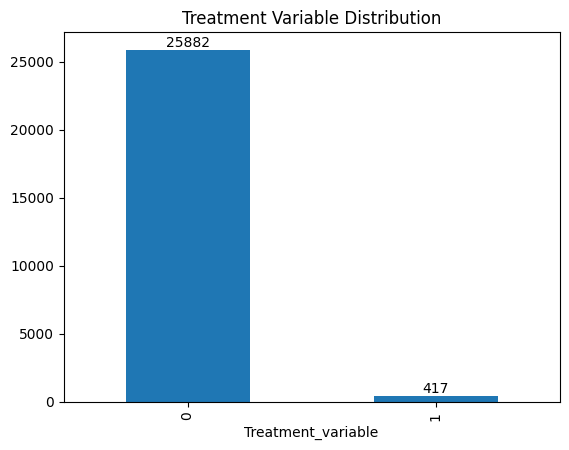

In [257]:
ax = df_med_v4_final_pivot['Treatment_variable'].value_counts().plot(kind='bar')

# Add count on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Treatment Variable Distribution')
plt.show()

In [258]:
df_med_v4_final_pivot.head()

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,Treatment_variable
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.5,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.0,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.0,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.0,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.0,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0


In [259]:
len(df_med_v4_final_pivot['journey_id'].unique()) #unique patients

26299

In [260]:
df_pre.head()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,primary_care_npi,group_id,date_of_service,date_authorized,transaction_type,date_prescription_written,ndc11,ndc11_original,number_of_refills_authorized,diagnosis_code,diagnosis_code_type,quantity_prescribed_original,quantity_dispensed,place_of_service,is_service,level_of_service,fill_number,days_supply,unit_of_measure,daw_code,prior_authorization_type_code,is_compound_drug,coupon_type,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,pcn,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-04-15,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,2.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,29.79,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-03-16,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,1.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,28.95,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-05-17,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,3.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,29.99,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-02-15,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,0.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,28.95,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,2022-02-14,NaN,PAID,2022-02-14,65862059805,0.0,0.0,NaN,NaN,NaN,90.0,NaN,NaN,0.0,0.0,90.0,NaN,0.0,NaN,NaN,NaN,NaN,17.10,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,65862059805,True,190001,NaN


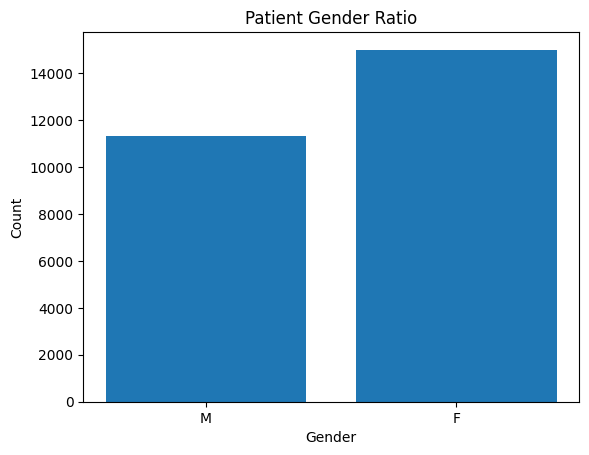

In [261]:
gender_counts = df_med_v4_final_pivot['patient_gender_M'].sum(), df_med_v4_final_pivot['patient_gender_F'].sum()
plt.bar(['M', 'F'], gender_counts)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Patient Gender Ratio')

plt.show()


In [262]:
df_pre_v1 = df_pre.drop(columns = ['claim_id','patient_gender', 'patient_state','patient_dob','patient_zip','pharmacy_npi','pharmacist_npi','prescriber_npi','primary_care_npi'])
#Dropping columns as they're not needed , and dropping patient_gender, patient_state and patient_dob as they are already present in medical dataset

In [263]:
df_pre_v1.head()

,journey_id,cohort_id,group_id,date_of_service,date_authorized,transaction_type,date_prescription_written,ndc11,ndc11_original,number_of_refills_authorized,diagnosis_code,diagnosis_code_type,quantity_prescribed_original,quantity_dispensed,place_of_service,is_service,level_of_service,fill_number,days_supply,unit_of_measure,daw_code,prior_authorization_type_code,is_compound_drug,coupon_type,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,pcn,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,NaN,2022-04-15,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,2.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,29.79,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
1,00006390c96ebfffed580074c35a16a7,16,NaN,2022-03-16,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,1.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,28.95,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
2,00006390c96ebfffed580074c35a16a7,16,NaN,2022-05-17,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,3.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,29.99,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
3,00006390c96ebfffed580074c35a16a7,16,NaN,2022-02-15,NaN,PAID,2022-02-14,47335067381,0.0,3.0,NaN,NaN,NaN,30.0,NaN,NaN,0.0,0.0,30.0,NaN,0.0,NaN,NaN,NaN,NaN,28.95,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
4,00006390c96ebfffed580074c35a16a7,16,NaN,2022-02-14,NaN,PAID,2022-02-14,65862059805,0.0,0.0,NaN,NaN,NaN,90.0,NaN,NaN,0.0,0.0,90.0,NaN,0.0,NaN,NaN,NaN,NaN,17.10,0.0,0.0,6334225,22659.0,NaN,NaN,NaN,NaN,NaN,65862059805,True,190001,NaN


In [264]:
list_columns_pre = list(df_pre_v1.columns)

In [265]:
for i in list_columns_pre:
    x = len(df_pre_v1[i].unique())
    print('Unique values for column ' + i + ':', x) #checking unique values for each column

Unique values for column journey_id: 14832
Unique values for column cohort_id: 2
Unique values for column group_id: 2049
Unique values for column date_of_service: 590
Unique values for column date_authorized: 586
Unique values for column transaction_type: 3
Unique values for column date_prescription_written: 588
Unique values for column ndc11: 16227
Unique values for column ndc11_original: 4671
Unique values for column number_of_refills_authorized: 73
Unique values for column diagnosis_code: 2719
Unique values for column diagnosis_code_type: 3
Unique values for column quantity_prescribed_original: 217
Unique values for column quantity_dispensed: 579
Unique values for column place_of_service: 8
Unique values for column is_service: 3
Unique values for column level_of_service: 7
Unique values for column fill_number: 30
Unique values for column days_supply: 215
Unique values for column unit_of_measure: 5
Unique values for column daw_code: 23
Unique values for column prior_authorization_typ

In [266]:
df_pre_v1.drop(columns = ['group_id', 'ndc11', 'ndc11_original', 'diagnosis_code', 'pcn', 'bin', 'reject_code_1','reject_code_3','reject_code_4','reject_code_5','ndc','date_authorized','date_of_service','start_date','end_date','date_prescription_written'], inplace = True)
#Dropping categorical columns with high number of unique values

In [267]:
df_pre_v1.isnull().sum()

journey_id                            0
cohort_id                             0
transaction_type                      0
number_of_refills_authorized      45104
diagnosis_code_type              782989
quantity_prescribed_original     572275
quantity_dispensed                    7
place_of_service                 548426
is_service                       216300
level_of_service                 676672
fill_number                           0
days_supply                           0
unit_of_measure                  300033
daw_code                         702479
prior_authorization_type_code    885707
is_compound_drug                 110029
coupon_type                      892593
coupon_value_amount              894618
pharmacy_submitted_cost          109542
patient_pay                      292803
copay_coinsurance                483240
plan_pay                         402745
active                                0
dtype: int64

In [268]:
df_pre_v1.drop(columns = ['diagnosis_code_type', 'quantity_prescribed_original','place_of_service','level_of_service','daw_code','prior_authorization_type_code','coupon_type', 'coupon_value_amount','copay_coinsurance', 'plan_pay','unit_of_measure','patient_pay'],inplace = True)
#dropping bc high no. of missing values

In [269]:
df_pre_v1.head()

,journey_id,cohort_id,transaction_type,number_of_refills_authorized,quantity_dispensed,is_service,fill_number,days_supply,is_compound_drug,pharmacy_submitted_cost,active
0,00006390c96ebfffed580074c35a16a7,16,PAID,3.0,30.0,NaN,2.0,30.0,NaN,29.79,True
1,00006390c96ebfffed580074c35a16a7,16,PAID,3.0,30.0,NaN,1.0,30.0,NaN,28.95,True
2,00006390c96ebfffed580074c35a16a7,16,PAID,3.0,30.0,NaN,3.0,30.0,NaN,29.99,True
3,00006390c96ebfffed580074c35a16a7,16,PAID,3.0,30.0,NaN,0.0,30.0,NaN,28.95,True
4,00006390c96ebfffed580074c35a16a7,16,PAID,0.0,90.0,NaN,0.0,90.0,NaN,17.10,True


In [270]:
df_pre_v1.isnull().sum()

journey_id                           0
cohort_id                            0
transaction_type                     0
number_of_refills_authorized     45104
quantity_dispensed                   7
is_service                      216300
fill_number                          0
days_supply                          0
is_compound_drug                110029
pharmacy_submitted_cost         109542
active                               0
dtype: int64

In [271]:
df_pre_v1['is_service'].unique() 


array([nan, False, True], dtype=object)

In [272]:
df_pre_v1['is_compound_drug'].unique()

array([nan, False, True], dtype=object)

In [273]:
service_list = [False,True]
compound_drug_list = [False,True]

df_pre_v1['is_service'] = df_pre_v1['is_service'].apply(lambda x: np.random.choice(service_list) if pd.isnull(x) else x)
df_pre_v1['is_compound_drug'] = df_pre_v1['is_compound_drug'].apply(lambda x: np.random.choice(compound_drug_list) if pd.isnull(x) else x)

df_pre_v1['quantity_dispensed'].fillna(df_pre_v1['quantity_dispensed'].mean(), inplace = True)
df_pre_v1['pharmacy_submitted_cost'].fillna(df_pre_v1['pharmacy_submitted_cost'].mean(), inplace = True)
df_pre_v1['number_of_refills_authorized'].fillna(df_pre_v1['number_of_refills_authorized'].mean(), inplace = True)

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/1819026676.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pre_v1['quantity_dispensed'].fillna(df_pre_v1['quantity_dispensed'].mean(), inplace = True)
/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/1819026676.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedi

In [274]:
df_pre_v1.isnull().sum()

journey_id                      0
cohort_id                       0
transaction_type                0
number_of_refills_authorized    0
quantity_dispensed              0
is_service                      0
fill_number                     0
days_supply                     0
is_compound_drug                0
pharmacy_submitted_cost         0
active                          0
dtype: int64

In [275]:
#df_pre_v1 has no missing values

In [276]:
for i in ['journey_id', 'cohort_id', 'transaction_type',
       'number_of_refills_authorized', 'quantity_dispensed', 'is_service',
       'fill_number', 'days_supply', 'is_compound_drug',
       'pharmacy_submitted_cost', 'active']:
    x = len(df_pre_v1[i].unique())
    print('Unique values for column ' + i + ':', x)

Unique values for column journey_id: 14832
Unique values for column cohort_id: 2
Unique values for column transaction_type: 3
Unique values for column number_of_refills_authorized: 73
Unique values for column quantity_dispensed: 579
Unique values for column is_service: 2
Unique values for column fill_number: 30
Unique values for column days_supply: 215
Unique values for column is_compound_drug: 2
Unique values for column pharmacy_submitted_cost: 43046
Unique values for column active: 2


In [277]:
num_cols = ['number_of_refills_authorized', 'quantity_dispensed','days_supply','pharmacy_submitted_cost']
cat_cols = ['cohort_id', 'transaction_type','is_service','is_compound_drug']

In [278]:
df_pre_v2 = pd.get_dummies(df_pre_v1, columns = cat_cols) #Dummy vars for categorical vars

In [279]:
df_pre_v2.columns

Index(['journey_id', 'number_of_refills_authorized', 'quantity_dispensed',
       'fill_number', 'days_supply', 'pharmacy_submitted_cost', 'active',
       'cohort_id_16', 'cohort_id_17', 'transaction_type_PAID',
       'transaction_type_REJECTED', 'transaction_type_REVERSED',
       'is_service_False', 'is_service_True', 'is_compound_drug_False',
       'is_compound_drug_True'],
      dtype='object')

In [280]:
df_pre_v2.head()

,journey_id,number_of_refills_authorized,quantity_dispensed,fill_number,days_supply,pharmacy_submitted_cost,active,cohort_id_16,cohort_id_17,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,is_service_False,is_service_True,is_compound_drug_False,is_compound_drug_True
0,00006390c96ebfffed580074c35a16a7,3.0,30.0,2.0,30.0,29.79,True,True,False,True,False,False,False,True,False,True
1,00006390c96ebfffed580074c35a16a7,3.0,30.0,1.0,30.0,28.95,True,True,False,True,False,False,False,True,True,False
2,00006390c96ebfffed580074c35a16a7,3.0,30.0,3.0,30.0,29.99,True,True,False,True,False,False,True,False,True,False
3,00006390c96ebfffed580074c35a16a7,3.0,30.0,0.0,30.0,28.95,True,True,False,True,False,False,False,True,True,False
4,00006390c96ebfffed580074c35a16a7,0.0,90.0,0.0,90.0,17.10,True,True,False,True,False,False,False,True,False,True


In [281]:
dummy_columns_list = ['cohort_id_16', 'cohort_id_17', 'transaction_type_PAID',
       'transaction_type_REJECTED', 'transaction_type_REVERSED',
       'is_service_False', 'is_service_True', 'is_compound_drug_False',
       'is_compound_drug_True']

In [282]:
df_pre_v2_pivot1 = pd.pivot_table(df_pre_v2, index = 'journey_id', values = num_cols, aggfunc = np.mean) #Pivot table for aggregating data

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/1899957331.py:1: FutureWarning: The provided callable <function mean at 0x105e679d0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pre_v2_pivot1 = pd.pivot_table(df_pre_v2, index = 'journey_id', values = num_cols, aggfunc = np.mean) #Pivot table for aggregating data


In [283]:
df_pre_v2_pivot2 = pd.pivot_table(df_pre_v2, index = 'journey_id', values = dummy_columns_list, aggfunc = np.sum) 

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/1821381368.py:1: FutureWarning: The provided callable <function sum at 0x105e63a60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pre_v2_pivot2 = pd.pivot_table(df_pre_v2, index = 'journey_id', values = dummy_columns_list, aggfunc = np.sum)


In [284]:
df_pre_v3 = pd.merge(df_pre_v2_pivot1,df_pre_v2_pivot2, how = 'inner', on = 'journey_id') #inner join

In [285]:
df_pre_v2_pivot3 = pd.pivot_table(df_pre_v2, index = 'journey_id', values = 'cohort_id_16', aggfunc = len)
df_pre_v2_pivot3.rename(columns = {'cohort_id_16':'num_prescriptions'}, inplace = True)

In [286]:
df_pre_v4 = pd.merge(df_pre_v3,df_pre_v2_pivot3, how = 'inner', on = 'journey_id')
df_pre_v4.reset_index(inplace = True)

In [287]:
df_pre_v4.head()

,journey_id,days_supply,number_of_refills_authorized,pharmacy_submitted_cost,quantity_dispensed,cohort_id_16,cohort_id_17,is_compound_drug_False,is_compound_drug_True,is_service_False,is_service_True,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,num_prescriptions
0,00006390c96ebfffed580074c35a16a7,46.107143,2.571429,162.510015,76.082143,28,0,20,8,19,9,28,0,0,28
1,000072bc05e31d0126475c7a3e771af1,30.014925,2.454084,63.512985,28.567164,67,0,59,8,56,11,55,10,2,67
2,00011020325337a2a22fb26b6492196a,49.516129,0.225806,454.705216,46.806452,31,0,31,0,17,14,31,0,0,31
3,0002af1d15822206675ddbf0242017e6,64.430380,0.379747,93.476076,81.898734,79,0,68,11,64,15,73,2,4,79
4,000362c8cc869075f4c2b6533887d4aa,26.368421,1.842105,454.705216,26.671053,38,0,38,0,15,23,35,0,3,38


In [288]:
df_pre_v4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14832 entries, 0 to 14831
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   journey_id                    14832 non-null  object 
 1   days_supply                   14832 non-null  float64
 2   number_of_refills_authorized  14832 non-null  float64
 3   pharmacy_submitted_cost       14832 non-null  float64
 4   quantity_dispensed            14832 non-null  float64
 5   cohort_id_16                  14832 non-null  int64  
 6   cohort_id_17                  14832 non-null  int64  
 7   is_compound_drug_False        14832 non-null  int64  
 8   is_compound_drug_True         14832 non-null  int64  
 9   is_service_False              14832 non-null  int64  
 10  is_service_True               14832 non-null  int64  
 11  transaction_type_PAID         14832 non-null  int64  
 12  transaction_type_REJECTED     14832 non-null  int64  
 13  t

In [289]:
for i in dummy_columns_list:
    df_pre_v4[i] = df_pre_v4[i]/df_pre_v4['num_prescriptions']

In [290]:
df_final_merged = pd.merge(df_med_v4_final_pivot,df_pre_v4, on = 'journey_id',how = 'left') #left join on journey_id

In [291]:
df_final_merged.isnull().sum().sort_values(ascending=False) #checking missing values in descending order

num_prescriptions                                           11961
is_compound_drug_False                                      11961
days_supply                                                 11961
pharmacy_submitted_cost                                     11961
quantity_dispensed                                          11961
cohort_id_16                                                11961
cohort_id_17                                                11961
number_of_refills_authorized                                11961
is_compound_drug_True                                       11961
is_service_True                                             11961
transaction_type_PAID                                       11961
transaction_type_REJECTED                                   11961
transaction_type_REVERSED                                   11961
is_service_False                                            11961
visit_type_inpatient visit                                      0
place_of_s

In [292]:
missing_values_list = ['days_supply', 'number_of_refills_authorized',
       'pharmacy_submitted_cost', 'quantity_dispensed', 'cohort_id_16',
       'cohort_id_17', 'is_compound_drug_False', 'is_compound_drug_True',
       'is_service_False', 'is_service_True', 'transaction_type_PAID',
       'transaction_type_REJECTED', 'transaction_type_REVERSED',
       'num_prescriptions']
for i in missing_values_list:
    df_final_merged[i].fillna(df_final_merged[i].mean(), inplace = True) #filling missing values with mean

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_24616/4130817703.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final_merged[i].fillna(df_final_merged[i].mean(), inplace = True) #filling missing values with mean


Text(0.5, 1.0, 'Correlation Heatmap')

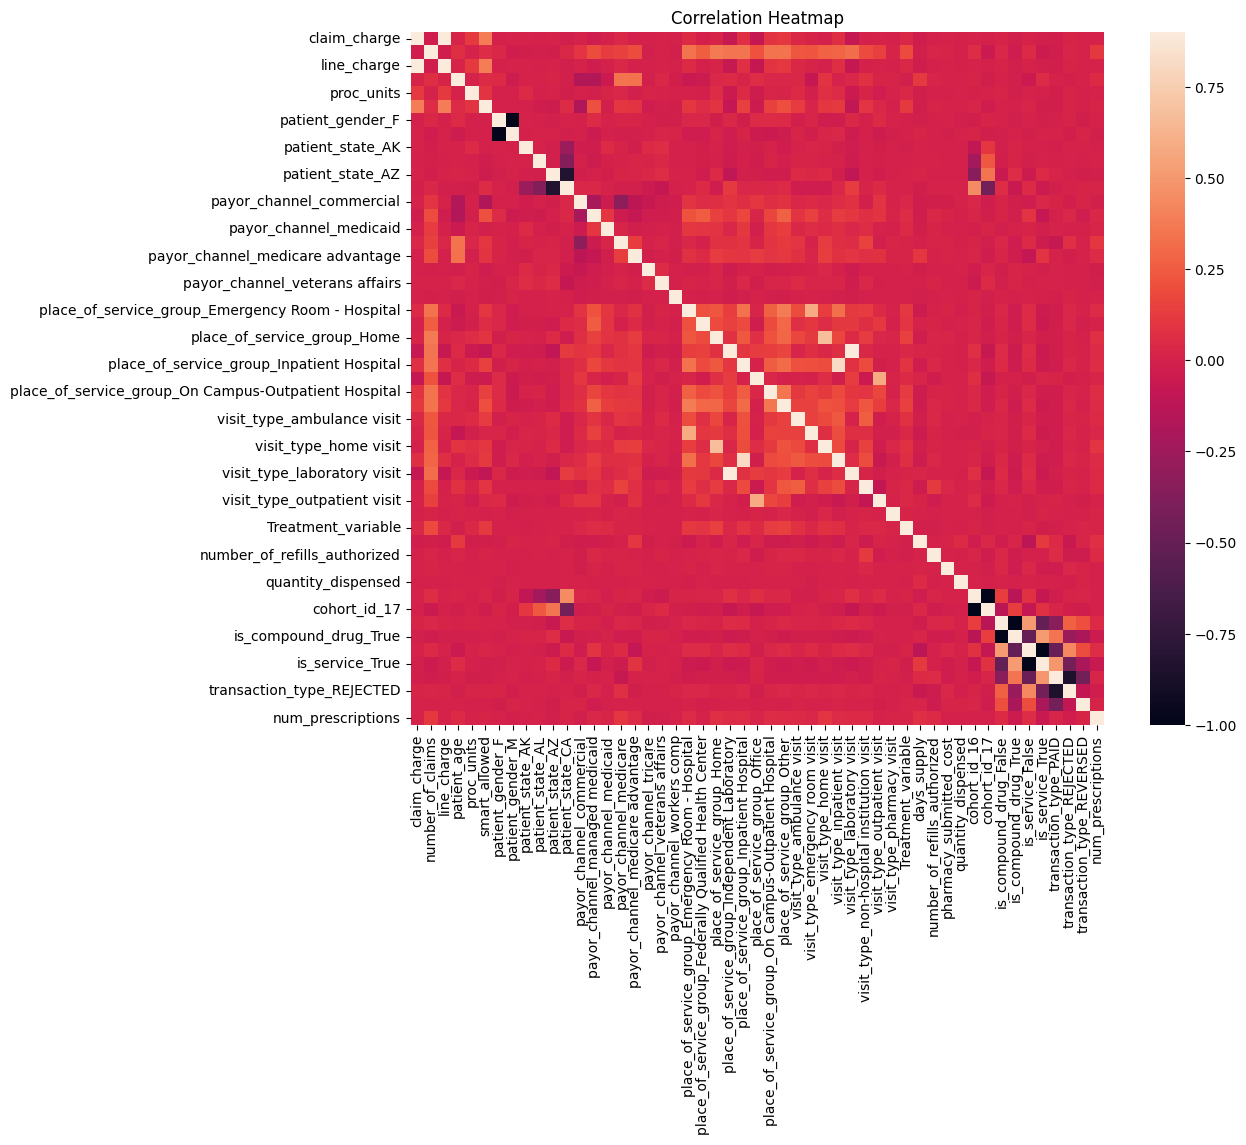

In [293]:
numeric_cols = df_final_merged.select_dtypes(include=[np.number]).columns
corrmat = df_final_merged[numeric_cols].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.title("Correlation Heatmap")

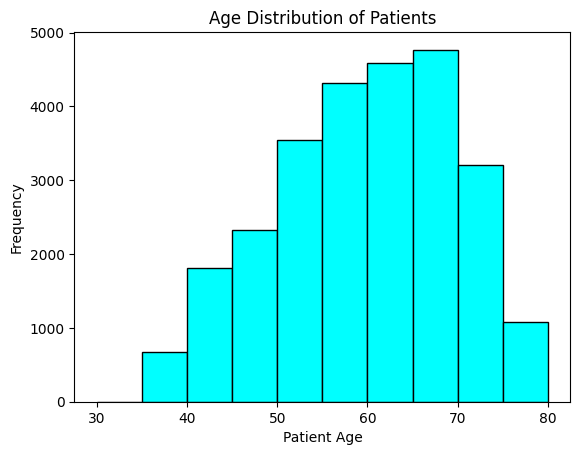

In [294]:
# Age distribution of patients 
plt.hist(df_final_merged['patient_age'], bins=10, color='cyan', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

# Show the histogram
plt.show()

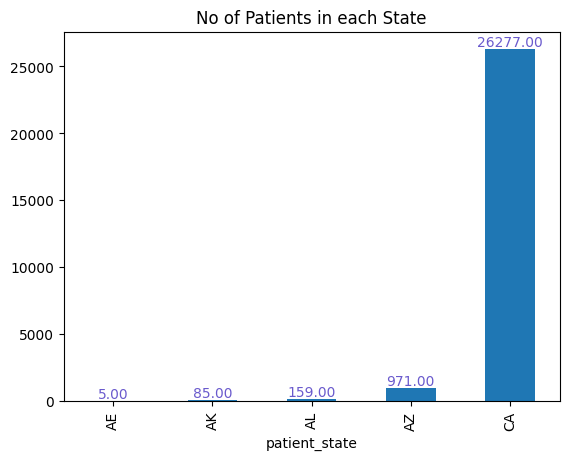

In [295]:
# No of patients' states
patient_state_cnt = df_med_v2.groupby('patient_state')['journey_id'].nunique()

# plot a bar plot
patient_state_cnt .plot.bar()
for i, v in enumerate(patient_state_cnt):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', color = 'slateblue')
plt.title('No of Patients in each State')
plt.show()

/Users/shayanfarshid/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


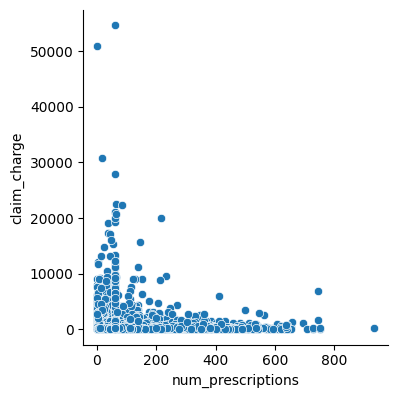

In [296]:
sns.pairplot(df_final_merged, x_vars=['num_prescriptions'], 
             y_vars='claim_charge', size=4, aspect=1, kind='scatter')
plt.show()

# Part 3 and 4: Causal Analysis and Double-Lasso

In [297]:
df_final_merged.head()

,journey_id,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,Treatment_variable,days_supply,number_of_refills_authorized,pharmacy_submitted_cost,quantity_dispensed,cohort_id_16,cohort_id_17,is_compound_drug_False,is_compound_drug_True,is_service_False,is_service_True,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,num_prescriptions
0,00006390c96ebfffed580074c35a16a7,150.000000,4,150.000000,57.500000,1.5,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,46.107143,2.571429,162.510015,76.082143,1.000000,0.000000,0.714286,0.285714,0.678571,0.321429,1.000000,0.000000,0.000000,28.000000
1,00006d564a4718c744f1bbf1b6c5f8c3,864.875000,18,864.875000,50.555556,1.0,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,38.574041,2.141304,455.396532,72.651453,0.934353,0.065647,0.927338,0.072662,0.861229,0.138771,0.679427,0.219162,0.101410,60.677431
2,000072bc05e31d0126475c7a3e771af1,145.000000,2,145.000000,55.000000,1.0,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,30.014925,2.454084,63.512985,28.567164,1.000000,0.000000,0.880597,0.119403,0.835821,0.164179,0.820896,0.149254,0.029851,67.000000
3,00011020325337a2a22fb26b6492196a,158.607805,41,158.607805,73.414634,1.0,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,49.516129,0.225806,454.705216,46.806452,1.000000,0.000000,1.000000,0.000000,0.548387,0.451613,1.000000,0.000000,0.000000,31.000000
4,00025243850b83969606f3f2aafc2d99,91.598000,5,91.598000,70.000000,1.0,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,38.574041,2.141304,455.396532,72.651453,0.934353,0.065647,0.927338,0.072662,0.861229,0.138771,0.679427,0.219162,0.101410,60.677431


In [298]:
df_final_merged.drop(columns = 'journey_id',inplace = True)

In [299]:
X = df_final_merged.drop(columns = ['number_of_claims','Treatment_variable'])
d = df_final_merged['Treatment_variable']

In [300]:
lasso1 = Lasso(alpha=0.1)
lasso1.fit(X, d)

Lasso(alpha=0.1)

In [301]:
d_hat = lasso1.predict(X) #predicting the treatment variable

In [303]:
df_final_merged['d_hat'] = d_hat

In [304]:
df_final_merged.head()

,claim_charge,number_of_claims,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,Treatment_variable,days_supply,number_of_refills_authorized,pharmacy_submitted_cost,quantity_dispensed,cohort_id_16,cohort_id_17,is_compound_drug_False,is_compound_drug_True,is_service_False,is_service_True,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,num_prescriptions,d_hat
0,150.000000,4,150.000000,57.500000,1.5,512.802500,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,46.107143,2.571429,162.510015,76.082143,1.000000,0.000000,0.714286,0.285714,0.678571,0.321429,1.000000,0.000000,0.000000,28.000000,0.033808
1,864.875000,18,864.875000,50.555556,1.0,180.650556,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,38.574041,2.141304,455.396532,72.651453,0.934353,0.065647,0.927338,0.072662,0.861229,0.138771,0.679427,0.219162,0.101410,60.677431,0.014289
2,145.000000,2,145.000000,55.000000,1.0,85.380000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,30.014925,2.454084,63.512985,28.567164,1.000000,0.000000,0.880597,0.119403,0.835821,0.164179,0.820896,0.149254,0.029851,67.000000,0.010025
3,158.607805,41,158.607805,73.414634,1.0,95.104146,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,49.516129,0.225806,454.705216,46.806452,1.000000,0.000000,1.000000,0.000000,0.548387,0.451613,1.000000,0.000000,0.000000,31.000000,0.010546
4,91.598000,5,91.598000,70.000000,1.0,83.376000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,38.574041,2.141304,455.396532,72.651453,0.934353,0.065647,0.927338,0.072662,0.861229,0.138771,0.679427,0.219162,0.101410,60.677431,0.010062


In [305]:
X = df_final_merged.drop(columns = ['number_of_claims'])
y = df_final_merged['number_of_claims']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state = 42) 
#splitting ratio 80-20

In [307]:
X_train_updated = X_train.drop(columns = ['Treatment_variable','d_hat'])
d_train = X_train['Treatment_variable']
d_hat_train = X_train['d_hat']

In [308]:
X_test_updated = X_test.drop(columns = ['Treatment_variable','d_hat'])
d_test = X_test['Treatment_variable']
d_hat_test = X_test['d_hat']

In [309]:
X_train_final = pd.concat([d_train, d_hat_train, X_train_updated], axis = 1)
X_test_final = pd.concat([d_test, d_hat_test, X_test_updated], axis = 1)

In [310]:
X_train_final.head()

,Treatment_variable,d_hat,claim_charge,line_charge,patient_age,proc_units,smart_allowed,patient_gender_F,patient_gender_M,patient_state_AK,patient_state_AL,patient_state_AZ,patient_state_CA,payor_channel_commercial,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,place_of_service_group_Emergency Room - Hospital,place_of_service_group_Federally Qualified Health Center,place_of_service_group_Home,place_of_service_group_Independent Laboratory,place_of_service_group_Inpatient Hospital,place_of_service_group_Office,place_of_service_group_On Campus-Outpatient Hospital,place_of_service_group_Other,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit,days_supply,number_of_refills_authorized,pharmacy_submitted_cost,quantity_dispensed,cohort_id_16,cohort_id_17,is_compound_drug_False,is_compound_drug_True,is_service_False,is_service_True,transaction_type_PAID,transaction_type_REJECTED,transaction_type_REVERSED,num_prescriptions
10623,0,0.010536,317.672526,317.672526,67.105263,1.157895,101.678737,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,30.000000,0.000000,151.440000,30.000000,1.0,0.0,1.0,0.0,1.000000,0.000000,0.750000,0.250000,0.000000,4.0
21318,0,0.038367,412.750000,412.750000,50.000000,1.000000,603.020000,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,30.000000,0.000000,99.235000,90.000000,1.0,0.0,1.0,0.0,1.000000,0.000000,0.166667,0.833333,0.000000,6.0
12852,0,0.008258,86.276190,86.276190,50.000000,1.285714,52.275714,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,28.384615,4.038462,454.705216,29.230769,1.0,0.0,1.0,0.0,0.384615,0.615385,0.961538,0.000000,0.038462,26.0
6622,0,0.010090,510.000000,510.000000,70.000000,1.000000,99.570000,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.000000,2.496945,13.333333,0.666667,1.0,0.0,1.0,0.0,1.000000,0.000000,0.666667,0.000000,0.333333,3.0
3435,0,0.026002,283.002857,283.002857,65.000000,1.000000,375.034286,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,61.137255,1.568627,344.949002,81.000000,1.0,0.0,1.0,0.0,0.803922,0.196078,0.803922,0.137255,0.058824,51.0


In [311]:
class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=10000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None

    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=10000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None

    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)
#The class has a method fit that is used to fit the model and a method predict that is used to predict the values of the target variable.
#apply_penalty applies the penalty to the model, alpha is regularization parameter, tolerance is stopping criterion, max_iterations is max no of iterations, and w is weight of the model

In [312]:
X = X_train_final.values
n_samples = len(X)
X = np.hstack((np.ones((n_samples, 1)), X)) 
y = y_train.values
n_samples

5259

In [314]:
apply_penalty = np.array([False, False] + [True]*50) #For applying a penalty term to the model for variables
max_iterations = 10000 # Optional; to determine how long the model will look for l1 penalty
model = SelectiveRegularizationLinearRegression(0.05, apply_penalty) #alpha = 0.05 assuming a very small regularization parameter
model.fit(X, y)

Here we are using the double-lasso method to tackle endogeneity, which arises when some X variables are correlated with or affect the treatment variable. To handle this, we first regress the treatment variable (d) on the X variables. Then, we use the predicted values (d-hat) from this first step in a second regression, allowing us to estimate the treatment effect while accounting for the endogeneity issue

# Part 5

# Treatment Effect

In [320]:
print("Treatment Effect:", model.w[0]) # To print out the model coefficients

Treatment Effect: -13.95381331763693


Treatment effect of -13.95 suggests that the use of Ozempic has a negative impact on the target patient population. Meaning, on average, patients who received Ozempic experienced a decrease in the target outcome compared to those who didn't receive the treatment.

In [316]:
X_test_final_val = X_test_final.values
n_samples = len(X_test_final_val)
X_test_final_val = np.hstack((np.ones((n_samples, 1)), X_test_final_val))

In [317]:
y_pred = model.predict(X_test_final_val)

# Model Performance

In [318]:
r2_score(y_test,y_pred)

0.40931419654249135

In [319]:
#R square is 0.41, which means that the model explains about 41% of the variance in the dependent variable.
#This is a low R square, which means that the model does not explain much of the variance.
#Treatment effect of -13.9 indicates that the treatment has a negative effect on the number of claims.